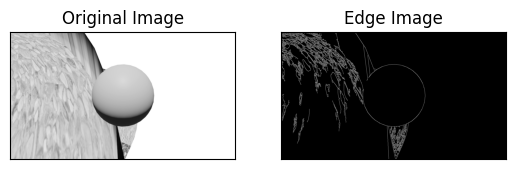

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



img = cv.imread('off_track.png', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 0, 200)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

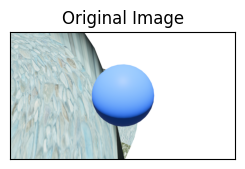

In [12]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('off_track.png')

plt.subplot(121), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, tresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [13]:
import cv2 as cv
import numpy as np

img = cv.imread('track.png')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)